<a href="https://colab.research.google.com/github/ammobam/Study_DeepLearing/blob/main/210811_PyTorch_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ** Torch 소개
- facebook이 만든 Python을 위한 오픈소스 머신러닝 라이브러링
- GPU 사용이 가능하기 때문에 속도가 빠름
- 최근에는 PyTorch 사용자가 늘어나고 있음
- PyTorch의 장점 : Microsoft의 프레임워크가 모델전환이 가능함


- 다른 딥러닝 패키지 : TensorFlow
    - 먼저 배포되어 현재까지 사용자가 많으나 비직관적인 구조, 학습 난이도가 높음
    - TensorFlow는 비직관적인 구조를 개선하기 위해 2.0에서 Keras를 포집함



1) Pytorch 설치

```
	pip install torch torchvision
	conda install pytorch torchvision -c pytorch
```

2) GPU 사용을 위한 설정
- CUDA 설치
	- https://developer.nvidia.com/cuda-toolkit-archive

- cuDNN 설치
	- https://developer.nvidia.com/cudnn

- 윈도우에 GPU 확인하는 방법
	- 작업관리자 > 성능 > GPU 확인

## Torch 설치

In [1]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.9631, 0.6426, 0.8523],
        [0.8878, 0.2459, 0.8171],
        [0.1911, 0.1547, 0.5760],
        [0.5163, 0.3672, 0.5157],
        [0.8142, 0.5548, 0.0964]])


## Tensor
- Tensor
- 데이터를 표현하는 단위
- Scalar, Vector, Matmul, Tensor등이 있음

1) Scalar
- 하나의 값

2) Vector
- 원래 의미는 데이터 모임을 Vector라고 함
- 프로그래밍 언어에서는 Collection이라고 표현함

- 1차원으로 모인 데이터의 집합
- Vector끼리 연산을 하면 동일한 위치의 데이터끼리 연산을 수행함
- torch에서 numpy의 ndarray 연산 대부분을 제공함

3) Matmul
- 행과 열 구조
- 벡터의 모임
- 내적을 구하는 메소드로 matmul을 지원함

4) Tensor
- Matrix의 배열

In [2]:
# 하나의 값을 스칼라 데이터라고 함
scalar_data = torch.tensor([1.0])
print("스칼라 데이터:", scalar_data)

# Vector : 1차원 데이터의 모임
vector1 = torch.tensor([1.0, 2.0])
vector2 = torch.tensor([4.0, 5.0])

# 동일한 인덱스의 데이터끼리 연산
# 2개 벡터 크기가 다르면 연산이 불가함
print("벡터의 덧셈:", vector1 + vector2)

# torch는 numpy의 거의 모든 연산을 지원함
# 행렬연산. 행, 열 단위로 계산함
# 하나의 벡터를 1개의 열로 간주하여 연산 수행함
print("벡터의 내적:", torch.dot(vector1, vector2))    # 1x2 dot 2x1 --> 1x1

# Matrix (행렬)
matrix1 = torch.tensor([[1, 2], [3, 4]])    # 2x2
matrix2 = torch.tensor([[5, 6], [7, 8]])    # 2x2
print("행렬연산 지원:\n", torch.matmul(matrix1, matrix2))    # 2x2

# Tensor : Matrix의 배열
tensor1 = torch.tensor([[[1, 2], [3, 4]], [[2, 2], [2, 2]]])    # 2x2 행렬 2개의 배열
print(tensor1)

스칼라 데이터: tensor([1.])
벡터의 덧셈: tensor([5., 7.])
벡터의 내적: tensor(14.)
행렬연산 지원:
 tensor([[19, 22],
        [43, 50]])
tensor([[[1, 2],
         [3, 4]],

        [[2, 2],
         [2, 2]]])


# ** MLP 설계를 통한 딥러닝의 이해
- MNIST 데이터셋 이용
- Pytorch는 클래스를 수정하여 모델을 생성, 훈련, 평가함
---
## 과정
- 필요한 모듈 불러오기
- 장비 확인
- 데이터 다운로드 및 분할
- 데이터 확인
- MLP 모델 설계
- Optimizer, Object Function 설정
- 학습진행 중 모델 성능을 확인하는 함수 정의
- 학습진행 중 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
- 학습진행 중 학습/테스트 데이터의 Loss 및 Accuracy 확인

## 필요한 모듈 불러오기

In [2]:
# 필요한 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt

# pytorch 기본모듈
import torch

# 딥러닝 모델을 만들 때 필요한 함수 모듈
import torch.nn as nn
# 자주 사용하는 함수 모듈
import torch.nn.functional as F

# 데이터 관련 모듈
from torchvision import transforms, datasets

## 장비 확인 - GPU 사용가능 여부 확인

In [3]:
# Colab GPU를 켜고 확인해보면 True가 나옴
print("GPU 사용가능 여부:", torch.cuda.is_available())

# 조건문으로 확인 가능
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('CPU')

print('torch version:', torch.__version__)
print('DEVICE:', DEVICE)

GPU 사용가능 여부: True
torch version: 1.9.0+cu102
DEVICE: cuda


## 데이터 준비

### 데이터 다운로드

In [33]:
# torch 에서 지원하는 MNIST 손글씨 데이터 가져오기
# 데이터를 다운로드 받아서 경로에 저장하고
# transform을 설정하면 텐서로 변경하고 0~1 사이로 정규화함
train_datasets = datasets.MNIST(root='/content/drive/MyDrive/data/MNIST', train=True, download=True, transform=transforms.ToTensor())
test_datasets = datasets.MNIST(root='/content/drive/MyDrive/data/MNIST', train=False, download=True, transform=transforms.ToTensor())


In [4]:
# 한 번에 훈련하는 크기
BATCH_SIZE = 32
# 훈련 횟수
EPOCHS = 10

In [27]:
# pytorch 딥러닝에서 사용할 형태로 데이터 변환
# 여기서 데이터 섞는 옵션 줄 수 있음
train_loader = torch.utils.data.DataLoader(dataset = train_datasets, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_datasets, batch_size=BATCH_SIZE, shuffle=True)

### 데이터 확인

In [31]:
# 데이터 확인
print(dir(train_loader))
print(dir(test_loader))

# 순환 가능한 데이터
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

# 훈련 데이터는 28*28 짜리 흑백 이미지이고 32개 씩 묶여 있음
# 훈련 레이블은 32개 짜리 스칼라 데이터가 묶여 있음

['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_index_sampler', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']
['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__ann

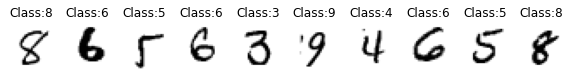

In [32]:
# 데이터 꺼내보기
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class:' + str(y_train[i].item()))

## MLP 모델 설계
- pytorch는 클래스를 상속받아서 모델을 설계함

In [17]:
# 모델 설계
class Net(nn.Module):
    # 생성자 - 초기화 메소드
    ## 인스턴스를 만들기 위해서 호출하는 함수
    def __init__(self):
        # 상위 클래스의 생성자를 호출
        ## Java, C++은 상위 클래스 생성자 호출하지 않음. 파이썬은 함.
        super(Net, self).__init__()
        # 인스턴스 변수 초기화 - 층을 쌓음
        self.fc1 = nn.Linear(28*28, 512)   # 입력층
        self.fc2 = nn.Linear(512, 256)     # 은닉층
        self.fc3 = nn.Linear(256, 10)      # 출력층

    # Forward Propagation을 위한 함수
    def forward(self, x):
        # 입력 데이터를 만들기 위해서 28*28의 1차원 데이터로 펼침
        x = x.view(-1, 28*28)
        
        # 입력층을 활성화해서 다음으로 넘김
        x = self.fc1(x)
        x = F.sigmoid(x)
        
        # 은닉층을 활성화해서 다음으로 넘김
        x = self.fc2(x)
        x = F.sigmoid(x)
        
        # 출력층을 활성화함
        # 활성화함수 softmax, log_softmax의 차이?
        # 로그값을 이용하면 역전파할 때 그래프의 기울기가 부드럽게 변하여 그라디언트 소실 문제를 예방함
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

In [38]:
# 모델 생성
model = Net().to(DEVICE)
## Net() : 클래스 불러와서 모델 객체 생성
## .to(DEVICE) : 장치 할당

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


## Optimizer, Object Function 설정
- Gradient Descent Method(경사하강법)
    - loss를 최소화하는 방법
- Optimizer
    - 경사하강법을 구현하는 함수
    - loss를 최소화하는 함수
- Optimizer 종류
    - SGD : 데이터를 미분하여 loss를 최소화해나가는 방법
	    - Stochastic Gradient Descent
    - SGD 외 여러 함수 이용 가능

In [39]:
# Optimizer 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
## lr : 학습률
## momentum : 관성, 일종의 가속도

# Loss Function 정의
criterion = nn.CrossEntropyLoss()
## criterion : 표준
## CrossEntropyLoss
    ## 다중분류를 위한 함수
    ## nn.LogSoftmax와 nn.NLLLoss의 연산의 조합

* nn.CrossEntropyLoss에 대하여
* http://www.gisdeveloper.co.kr/?p=8668

## 학습진행 중 모델 성능을 확인하는 함수 정의

In [67]:
def train(model, train_loader, optimizer, log_interval):
    # 모델 훈련 시작
    model.train()
    # 훈련 데이터의 배치번호, 이미지, 레이블을 순회함
    for batch_idx, (image, label) in enumerate(train_loader):
        # image, label을 DEVICE에 할당
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        # optimizer 초기화
        optimizer.zero_grad()
        # image로 예측
        output = model(image)
        # 손실 계산
        loss = criterion(output, label)
        # 손실 역전파
        loss.backward()

        # 파라미터 값(weight)을 업데이트
        ## weight를 업데이트 하고 사용한 optimizer는 None으로 초기화 하는 것!
        ## loss가 적을 때의 weight만 업데이트하고 다시 for문
        optimizer.step()

        # 출력
        if batch_idx % log_interval == 0:
            print('Train Epoch:{}[{}/{} {:.0f}%]\tTrain Loss:{:.6f}'.
                  format(epoch, batch_idx*len(image), len(train_loader.dataset), 100*batch_idx/len(train_loader), loss.item()))

### help(optimizer)

```
 |  zero_grad(self, set_to_none: bool = False)
 |      Sets the gradients of all optimized :class:`torch.Tensor` s to zero.
 |      
 |      Args:
 |          set_to_none (bool): instead of setting to zero, set the grads to None.
 |              This will in general have lower memory footprint, and can modestly improve performance.
 |              However, it changes certain behaviors. For example:
 |              1. When the user tries to access a gradient and perform manual ops on it,
 |              a None attribute or a Tensor full of 0s will behave differently.
 |              2. If the user requests ``zero_grad(set_to_none=True)`` followed by a backward pass, ``.grad``\ s
 |              are guaranteed to be None for params that did not receive a gradient.
 |              3. ``torch.optim`` optimizers have a different behavior if the gradient is 0 or None
 |              (in one case it does the step with a gradient of 0 and in the other it skips
 |              the step altogether).
```
```
 |  step(self, closure=None)
 |      Performs a single optimization step.
 |      
 |      Args:
 |          closure (callable, optional): A closure that reevaluates the model
 |              and returns the loss.
 ```


## 학습진행 중 검증 데이터에 대한 모델 성능을 확인하는 함수 정의

In [68]:
def evaluate(model, test_loader):
    # 모델 검증 시작
    model.eval()
    # 누적 손실을 계산하기 위한 변수
    test_loss = 0
    # 정확히 분류된 데이터의 개수를 세는 변수
    correct_cnt = 0

    # 훈련 데이터의 배치번호, 이미지, 레이블을 순회함
    with torch.no_grad():
        for image, label in test_loader:
            # image, label을 DEVICE에 할당
            image = image.to(DEVICE)
            label = label.to(DEVICE)

            # image로 예측
            output = model(image)
                ## output : 어떤 클래스로 분류할기 확률을 리턴한 텐서

            # 누적 손실 계산
            test_loss += criterion(output, label)

            # 정답의 개수를 계산
            prediction = output.max(1, keepdim=True)[1]
                ## ouput 텐서에서 가장 큰 값(확률)의 클래스를 리턴함
                ## keepdim : 차원도 같이 리턴하는 옵션
            correct_cnt += prediction.eq(label.view_as(prediction)).sum().item()
                ## 결과적으로, 예측값과 레이블값이 동일하면 1 더해주는 코드임
                ## .view_as : label은 텐서가 아니라서 prediction과 같은 타입으로 바꿔줌  #??정확한 기능 찾아보기
                ## .eq: prediction과, label의 값이 같은지 비교
                ## .sum().item() : True일 때의 개수를 리턴함                
        
        # 손실의 평균 구하기
        test_loss /= len(test_loader.dataset)    # /= : 나눠서 다시 왼쪽 변수에 할당
        # 정확도 구하기
        test_accuracy = 100 * correct_cnt / len(test_loader.dataset)
        return test_loss, test_accuracy

## 학습진행 중 학습/테스트 데이터의 Loss 및 Accuracy 확인

### 모델 훈련

In [69]:
# 정의한 함수 불러와서 모델 훈련하기
for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))

# [EPOCH:10]\ 	Test Loss : 0.0105 	Test Accuracy:90.03%
# 훈련할수록 Loss는 감소하고 Accuracy는 증가하는 것을 확인할 수 있음

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch:1[0/60000 0%]	Train Loss:2.313113
Train Epoch:1[6400/60000 11%]	Train Loss:2.280902
Train Epoch:1[12800/60000 21%]	Train Loss:2.335389
Train Epoch:1[19200/60000 32%]	Train Loss:2.323482
Train Epoch:1[25600/60000 43%]	Train Loss:2.324605
Train Epoch:1[32000/60000 53%]	Train Loss:2.309533
Train Epoch:1[38400/60000 64%]	Train Loss:2.302251
Train Epoch:1[44800/60000 75%]	Train Loss:2.273365
Train Epoch:1[51200/60000 85%]	Train Loss:2.232270
Train Epoch:1[57600/60000 96%]	Train Loss:2.216110

[EPOCH:1]\ 	Test Loss : 0.0694 	Test Accuracy:30.45%

Train Epoch:2[0/60000 0%]	Train Loss:2.181501
Train Epoch:2[6400/60000 11%]	Train Loss:2.175222
Train Epoch:2[12800/60000 21%]	Train Loss:2.260787
Train Epoch:2[19200/60000 32%]	Train Loss:2.014546
Train Epoch:2[25600/60000 43%]	Train Loss:1.962686
Train Epoch:2[32000/60000 53%]	Train Loss:1.845089
Train Epoch:2[38400/60000 64%]	Train Loss:1.629709
Train Epoch:2[44800/60000 75%]	Train Loss:1.527965
Train Epoch:2[51200/60000 85%]	Train Lo

---

# 딥러닝 모델을 개선하는 방법

## Dropout을 적용한 신경망
- 과적합과 경사소실에 대한 문제를 해결하기 위한 알고리즘

(1) 효과
- 신경망 학습 중 Layer의 노드를 랜덤하게 Drop함으로서 Generalization 효과를 냄

(2) 구동원리
- 실제 뉴런을 삭제하는 게 아님. 행렬에 0을 대입하여 연산 수행하는 것.
-- 대다수의 머신러닝 알고리즘은 input data, weight, hidden layer 모두 행렬 연산 수행함

- 누락할 뉴런 비율을 설정함

(3) 활용
- 신경망 설계시 많이 이용하는 기술임
- 훈련 데이터에 대한 과적합을 방지하여 결과적으로 모델 정확도가 좋아짐
- 주의 : 충분히 많은 epoch 수를 설정하여 훈련하고 비교해야 Dropout 효과를 알 수 있음

(4) Pytorch에서 구현 방법
- self.dropout_prob를 설정하고
- 출력층을 제외한 각 층의 끝에 설정함
- 출력층에 dropout을 설정하지 않는 이유 : 이득이 없고 성능만 떨어짐


In [ ]:
# 모델 수정 - dropout 추가

class Net(nn.Module):
    # 생성자 - 초기화 메소드
    def __init__(self):
        # 상위 클래스의 생성자를 호출
        super(Net, self).__init__()
        # 인스턴스 변수 초기화 - 층을 쌓음
        self.fc1 = nn.Linear(28*28, 512)   # 입력층
        self.fc2 = nn.Linear(512, 256)     # 은닉층
        self.fc3 = nn.Linear(256, 10)      # 출력층

        # dropout 설정 추가
        self.dropout_prob = 0.5

    # Forward Propagation을 위한 함수
    def forward(self, x):
        # 입력 데이터를 만들기 위해서 28*28의 1차원 데이터로 펼침
        x = x.view(-1, 28*28)
        
        # 입력층을 활성화해서 다음으로 넘김
        x = self.fc1(x)
        x = F.sigmoid(x)
        # dropout 추가
        x = F.dropout(x, training = self.training, p = self.dropout_prob)

        
        # 은닉층을 활성화해서 다음으로 넘김
        x = self.fc2(x)
        x = F.sigmoid(x)
        # dropout 추가
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        
        # 출력층을 활성화함
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        # 출력층에는 dropout을 설정하지 않음 ! 성능을 떨어뜨릴 뿐, 이득이 없음.

        return x

In [72]:
# 모델 생성
model = Net().to(DEVICE)

# Optimizer 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Loss Function 정의
criterion = nn.CrossEntropyLoss()

In [73]:
# 모델 훈련
for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))

# Dropout 효과 확인
# 전 : [EPOCH:10]\ 	Test Loss : 0.0105 	Test Accuracy:90.03%
# 후 : [EPOCH:10]\ 	Test Loss : 0.0103 	Test Accuracy:90.29%
# epoch 수가 적어서 Dropout의 효과를 알기 어려움
# Dropout으로 뉴런의 일부 값을 잃기 때문에 적은 epoch에서는 오히려 모델 성능이 나빠질 가능성도 있음

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch:1[0/60000 0%]	Train Loss:2.313703
Train Epoch:1[6400/60000 11%]	Train Loss:2.318047
Train Epoch:1[12800/60000 21%]	Train Loss:2.282327
Train Epoch:1[19200/60000 32%]	Train Loss:2.313968
Train Epoch:1[25600/60000 43%]	Train Loss:2.295457
Train Epoch:1[32000/60000 53%]	Train Loss:2.243975
Train Epoch:1[38400/60000 64%]	Train Loss:2.262578
Train Epoch:1[44800/60000 75%]	Train Loss:2.269325
Train Epoch:1[51200/60000 85%]	Train Loss:2.328547
Train Epoch:1[57600/60000 96%]	Train Loss:2.251366

[EPOCH:1]\ 	Test Loss : 0.0695 	Test Accuracy:33.98%

Train Epoch:2[0/60000 0%]	Train Loss:2.244982
Train Epoch:2[6400/60000 11%]	Train Loss:2.182992
Train Epoch:2[12800/60000 21%]	Train Loss:2.180601
Train Epoch:2[19200/60000 32%]	Train Loss:2.047811
Train Epoch:2[25600/60000 43%]	Train Loss:2.092475
Train Epoch:2[32000/60000 53%]	Train Loss:1.841512
Train Epoch:2[38400/60000 64%]	Train Loss:1.626981
Train Epoch:2[44800/60000 75%]	Train Loss:1.439450
Train Epoch:2[51200/60000 85%]	Train Lo

## 활성화 함수가 ReLU인 신경망

In [74]:
# 모델 수정 - dropout 추가

class Net(nn.Module):
    # 생성자 - 초기화 메소드
    def __init__(self):
        # 상위 클래스의 생성자를 호출
        super(Net, self).__init__()
        # 인스턴스 변수 초기화 - 층을 쌓음
        self.fc1 = nn.Linear(28*28, 512)   # 입력층
        self.fc2 = nn.Linear(512, 256)     # 은닉층
        self.fc3 = nn.Linear(256, 10)      # 출력층

        # dropout 설정 추가
        self.dropout_prob = 0.5

    # Forward Propagation을 위한 함수
    def forward(self, x):
        # 입력 데이터를 만들기 위해서 28*28의 1차원 데이터로 펼침
        x = x.view(-1, 28*28)
        
        # 입력층을 활성화해서 다음으로 넘김
        x = self.fc1(x)
        x = F.relu(x)
        # dropout 추가
        x = F.dropout(x, training = self.training, p = self.dropout_prob)

        
        # 은닉층을 활성화해서 다음으로 넘김
        x = self.fc2(x)
        x = F.relu(x)
        # dropout 추가
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        
        # 출력층을 활성화함
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        # 출력층에는 dropout을 설정하지 않음 ! 성능을 떨어뜨릴 뿐, 이득이 없음.

        return x

In [75]:
# 모델 생성
model = Net().to(DEVICE)

# Optimizer 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Loss Function 정의
criterion = nn.CrossEntropyLoss()

In [76]:
# 모델 훈련
for epoch in range(1, EPOCHS+1):
    # 훈련
    train(model , train_loader, optimizer, log_interval=200)
    # 검증해서 loss, accuracy 받아오기
    test_loss, test_accuracy = evaluate(model, test_loader)
    # 출력
    print('\n[EPOCH:{}]\ \tTest Loss : {:.4f} \tTest Accuracy:{:.2f}%\n'.format(epoch, test_loss, test_accuracy))

# 활성화함수 relu 효과 확인
# 전 : [EPOCH:10]\ 	Test Loss : 0.0103 	Test Accuracy:90.29%
# 후 : [EPOCH:10]\ 	Test Loss : 0.0027 	Test Accuracy:97.40%
# Loss는 감소하고 Accuracy는 증가함
# epoch 수가 적어서 ReLU의 효과를 알기 어려움
# 활성화함수들을 비교해보면 epoch 수가 충분히 커질 때 성능이 차이남

Train Epoch:1[0/60000 0%]	Train Loss:2.292025
Train Epoch:1[6400/60000 11%]	Train Loss:2.068696
Train Epoch:1[12800/60000 21%]	Train Loss:1.315995
Train Epoch:1[19200/60000 32%]	Train Loss:0.666023
Train Epoch:1[25600/60000 43%]	Train Loss:0.627972
Train Epoch:1[32000/60000 53%]	Train Loss:0.720902
Train Epoch:1[38400/60000 64%]	Train Loss:0.572086
Train Epoch:1[44800/60000 75%]	Train Loss:0.495520
Train Epoch:1[51200/60000 85%]	Train Loss:0.237104
Train Epoch:1[57600/60000 96%]	Train Loss:0.445136

[EPOCH:1]\ 	Test Loss : 0.0100 	Test Accuracy:90.84%

Train Epoch:2[0/60000 0%]	Train Loss:0.438757
Train Epoch:2[6400/60000 11%]	Train Loss:0.453742
Train Epoch:2[12800/60000 21%]	Train Loss:0.291302
Train Epoch:2[19200/60000 32%]	Train Loss:0.353523
Train Epoch:2[25600/60000 43%]	Train Loss:0.342037
Train Epoch:2[32000/60000 53%]	Train Loss:0.338289
Train Epoch:2[38400/60000 64%]	Train Loss:0.231173
Train Epoch:2[44800/60000 75%]	Train Loss:0.564083
Train Epoch:2[51200/60000 85%]	Train Lo

---
### Autograd를 사용

- Pytorch의 자동미분 엔진
	- 신경망이 BackPropagation(역전파)를 사용할 때,
	- 파라미터 업데이트 하는 방법을 구현하기 위한 엔진

- 4가지 값을 이용
	- BATSH_SIZE = 64
	- INPUT_SIZE = 1000
	- HIDDEN_SIZE = 100
	- OUTPUT_SIZE = 10

        - INPUT_SIZE가 (64, 1000)인 데이터와
        - (1000, 100) 크기의 행렬과 행렬곱을 계산하기 위한 수
        - OUTPUT_SIZE는 최종으로 출력되는 값의 벡터의 크기를 의미